In [17]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
img=cv2.imread('./testing/68290-1669394812.jpg')
img.shape

(390, 300, 3)

In [19]:
img

array([[[ 93, 112, 127],
        [ 93, 112, 127],
        [ 91, 110, 125],
        ...,
        [100, 134, 150],
        [102, 135, 151],
        [103, 136, 152]],

       [[ 88, 107, 122],
        [ 88, 107, 122],
        [ 88, 107, 122],
        ...,
        [ 98, 132, 148],
        [ 99, 132, 148],
        [100, 133, 149]],

       [[ 93, 109, 125],
        [ 92, 108, 124],
        [ 89, 108, 123],
        ...,
        [ 99, 132, 148],
        [ 98, 131, 147],
        [ 98, 131, 147]],

       ...,

       [[152, 242, 176],
        [151, 241, 175],
        [151, 241, 175],
        ...,
        [142, 236, 165],
        [143, 238, 164],
        [143, 238, 164]],

       [[151, 241, 175],
        [151, 241, 175],
        [150, 240, 174],
        ...,
        [142, 236, 165],
        [142, 237, 163],
        [143, 238, 164]],

       [[151, 241, 175],
        [150, 240, 174],
        [149, 239, 173],
        ...,
        [140, 234, 163],
        [141, 236, 162],
        [141, 236, 162]]

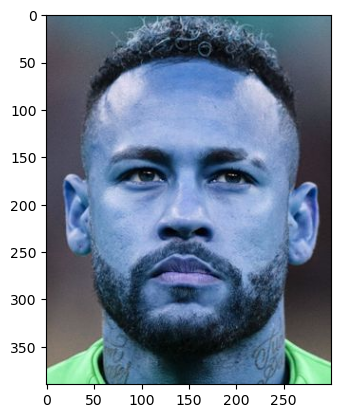

In [20]:
plt.imshow(img)

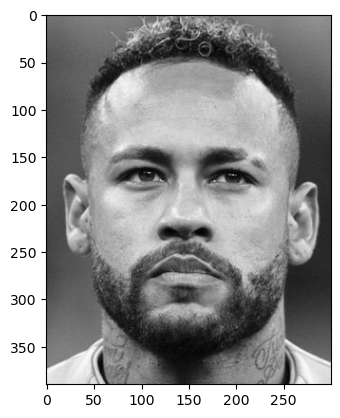

In [21]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [22]:
gray_img

array([[114, 114, 112, ..., 135, 136, 137],
       [109, 109, 109, ..., 133, 133, 134],
       [112, 111, 110, ..., 133, 132, 132],
       ...,
       [212, 211, 211, ..., 204, 205, 205],
       [211, 211, 210, ..., 204, 204, 205],
       [211, 210, 209, ..., 202, 203, 203]], dtype=uint8)

In [23]:
gray_img.shape

(390, 300)

In [24]:
face_classifier=cv2.CascadeClassifier('./OpenCV/HaarCascade/haarcascade_frontalface_default.xml')
eyes_classifier=cv2.CascadeClassifier('./OpenCV/HaarCascade/haarcascade_eye.xml')

In [25]:
faces=face_classifier.detectMultiScale(img,1.3,5)

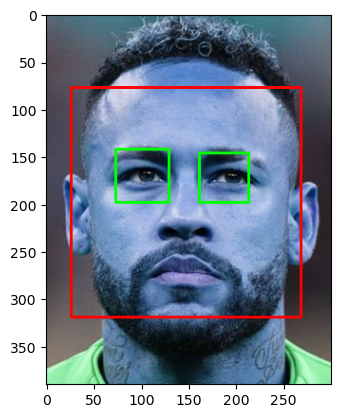

In [26]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    plt.imshow(face_img)
    roi_gray=gray_img[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eyes_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img, cmap='gray')
plt.show()

In [27]:
def cropped_image(image_path):
    image=cv2.imread(image_path)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eyes_classifier.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

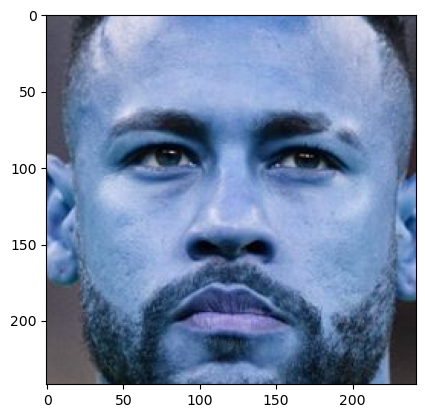

In [28]:
crop=cropped_image('./testing/68290-1669394812.jpg')
plt.imshow(crop)
crop_str=np.array(crop)

In [29]:
crop_str.shape

(242, 242, 3)

In [32]:
import os
img_dir=[]
for i in os.scandir(curr_dir):
    if i.is_dir():
        img_dir.append(i.path)

In [31]:
curr_dir='./dataset/'

In [33]:
print(img_dir)

['./dataset/angel de maria', './dataset/CROPPED', './dataset/CROPPEDangel de maria', './dataset/CROPPEDkevin de bruyne', './dataset/CROPPEDlionel messi', './dataset/CROPPEDneymar jr', './dataset/CROPPEDpaul pogba', './dataset/kevin de bruyne', './dataset/lionel messi', './dataset/neymar jr', './dataset/paul pogba']


In [18]:
cropped='./dataset/CROPPED'

In [22]:
import shutil
if os.path.exists(cropped):
    shutil.rmtree(cropped)
os.mkdir(cropped) 

In [24]:
cropped_image_dirs = []
footballer_file_names_dict = {}
for i in img_dir:
    count=1
    footballer_name=i.split('/')[-1]
    footballer_file_names_dict[footballer_name] = []
    for j in os.scandir(i):
        roi_color=cropped_image(j.path)
        if roi_color is not None:
            cropped_folder=cropped+footballer_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = footballer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            footballer_file_names_dict[footballer_name].append(cropped_file_path)
            count += 1
            

Generating cropped images in folder:  ./dataset/CROPPEDangel de maria
Generating cropped images in folder:  ./dataset/CROPPEDkevin de bruyne
Generating cropped images in folder:  ./dataset/CROPPEDlionel messi
Generating cropped images in folder:  ./dataset/CROPPEDneymar jr
Generating cropped images in folder:  ./dataset/CROPPEDpaul pogba


In [25]:
len(footballer_file_names_dict)

5

In [35]:
import pywt
def wavelet(image,level=1,mode='haar'):
    img_array=image
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array=np.float32(img_array)
    img_array/=255
    coeffs=pywt.wavedec2(img_array, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    img_array_H=pywt.waverec2(coeffs_H, mode);
    img_array_H *= 255;
    img_array_H =  np.uint8(img_array_H)
    return img_array_H

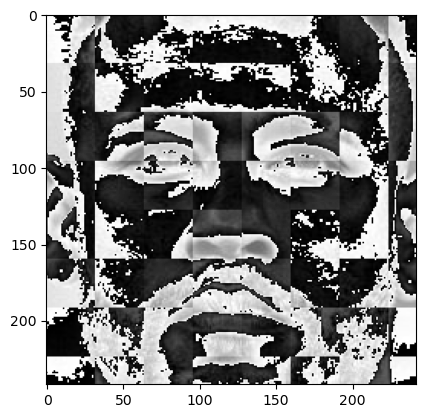

In [38]:
im_har = wavelet(crop_str,5,'db1')
plt.imshow(im_har,cmap='gray')

In [28]:
footballer_file_names_dict

{'angel de maria': ['./dataset/CROPPEDangel de maria/angel de maria1.png',
  './dataset/CROPPEDangel de maria/angel de maria2.png',
  './dataset/CROPPEDangel de maria/angel de maria3.png',
  './dataset/CROPPEDangel de maria/angel de maria4.png',
  './dataset/CROPPEDangel de maria/angel de maria5.png',
  './dataset/CROPPEDangel de maria/angel de maria6.png',
  './dataset/CROPPEDangel de maria/angel de maria7.png',
  './dataset/CROPPEDangel de maria/angel de maria8.png',
  './dataset/CROPPEDangel de maria/angel de maria9.png',
  './dataset/CROPPEDangel de maria/angel de maria10.png',
  './dataset/CROPPEDangel de maria/angel de maria11.png',
  './dataset/CROPPEDangel de maria/angel de maria12.png',
  './dataset/CROPPEDangel de maria/angel de maria13.png',
  './dataset/CROPPEDangel de maria/angel de maria14.png',
  './dataset/CROPPEDangel de maria/angel de maria15.png',
  './dataset/CROPPEDangel de maria/angel de maria16.png',
  './dataset/CROPPEDangel de maria/angel de maria17.png',
  './

In [29]:
cropped_image_dirs

['./dataset/CROPPEDangel de maria',
 './dataset/CROPPEDkevin de bruyne',
 './dataset/CROPPEDlionel messi',
 './dataset/CROPPEDneymar jr',
 './dataset/CROPPEDpaul pogba']

In [30]:
name_dict={}
a=0
for i in footballer_file_names_dict.keys():
    name_dict[i]=a
    a=a+1
    

In [31]:
print(name_dict)

{'angel de maria': 0, 'kevin de bruyne': 1, 'lionel messi': 2, 'neymar jr': 3, 'paul pogba': 4}


In [32]:
x=[]
y=[]
for i,j in footballer_file_names_dict.items():
    for k in j:
        im=cv2.imread(k)
        if im is None:
            continue
        scaled_im=cv2.resize(im,(32,32))
        im_har=wavelet(im,5,'db1')
        scaled_im_har=cv2.resize(im_har,(32,32))
        combined_img=np.vstack((scaled_im.reshape(32*32*3,1),scaled_im_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(name_dict[i])

In [33]:
x

[array([[ 44],
        [ 52],
        [ 61],
        ...,
        [  0],
        [254],
        [253]], dtype=uint8),
 array([[ 20],
        [ 22],
        [ 16],
        ...,
        [245],
        [237],
        [ 15]], dtype=uint8),
 array([[ 20],
        [ 22],
        [ 16],
        ...,
        [245],
        [237],
        [ 15]], dtype=uint8),
 array([[218],
        [236],
        [237],
        ...,
        [220],
        [221],
        [ 77]], dtype=uint8),
 array([[107],
        [105],
        [104],
        ...,
        [  3],
        [ 19],
        [ 10]], dtype=uint8),
 array([[107],
        [105],
        [104],
        ...,
        [  3],
        [ 19],
        [ 10]], dtype=uint8),
 array([[ 86],
        [ 64],
        [ 69],
        ...,
        [218],
        [219],
        [181]], dtype=uint8),
 array([[ 20],
        [ 22],
        [ 24],
        ...,
        [251],
        [249],
        [243]], dtype=uint8),
 array([[ 75],
        [ 75],
        [ 91],
        ...

In [34]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [35]:
x=np.array(x).reshape(len(x),4096).astype(float)

In [36]:
x

array([[ 44.,  52.,  61., ...,   0., 254., 253.],
       [ 20.,  22.,  16., ..., 245., 237.,  15.],
       [ 20.,  22.,  16., ..., 245., 237.,  15.],
       ...,
       [106., 101., 100., ...,  62.,  10.,   8.],
       [ 30.,  25.,  25., ..., 241., 241.,  24.],
       [148., 149., 153., ..., 252., 253.,   2.]])

In [37]:
x.shape

(182, 4096)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='linear',C=30))])
pipe.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=30, kernel='linear'))])

In [42]:
pipe.score(X_test,Y_test)

0.8378378378378378

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
pipe_ada=Pipeline([('scaler',StandardScaler()),('adaboost',AdaBoostClassifier(n_estimators=10,learning_rate=1.2))])

In [45]:
pipe_ada.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('adaboost',
                 AdaBoostClassifier(learning_rate=1.2, n_estimators=10))])

In [46]:
pipe_ada.score(X_test,Y_test)

0.32432432432432434

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [61]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=4, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.765953,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.530405,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.779655,{'logisticregression__C': 1}


In [62]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test,Y_test)

0.8378378378378378

In [64]:
best_estimators['random_forest'].score(X_test,Y_test)

0.4594594594594595

In [65]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.8108108108108109

In [66]:
best_clf = best_estimators['svm']

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix=confusion_matrix(Y_test,best_clf.predict(X_test))

In [73]:
confusion_matrix

array([[12,  0,  0,  0,  0],
       [ 0,  7,  1,  0,  0],
       [ 1,  0,  5,  0,  0],
       [ 0,  0,  1,  7,  0],
       [ 1,  0,  0,  2,  0]], dtype=int64)

In [79]:
import pickle
with open('Footballer_predictor.pickle','wb') as f:
    pickle.dump(best_clf,f)

In [80]:
import json
with open('name_dict.json','w') as f:
    f.write(json.dumps(name_dict))

In [76]:
name_dict

{'angel de maria': 0,
 'kevin de bruyne': 1,
 'lionel messi': 2,
 'neymar jr': 3,
 'paul pogba': 4}